In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'/workspace/DS/Kaggle_DS/Playground-Series-S3E7'

In [3]:
os.listdir('.')

['.DS_Store',
 '.ipynb_checkpoints',
 'PS-S3E7.ipynb',
 'logs.log',
 'playground-series-s3e7',
 'playground-series-s3e7.zip',
 'submission1.csv']

In [4]:
read_path = '/workspace/DS/Kaggle_DS/Playground-Series-S3E7/playground-series-s3e7'

In [5]:
data = pd.read_csv(os.path.join(read_path, 'train.csv'))

In [6]:
data.shape

(42100, 19)

In [7]:
data

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


In [8]:
data.drop(columns = ['id'], inplace=True )

In [9]:
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))
# sns.pairplot(data.drop(columns='booking_status'))
# plt.show()

In [10]:
data[data['avg_price_per_room']>400].shape, data[(data['no_of_children']>8)].shape

((5, 18), (2, 18))

In [11]:
data = data[ (data['avg_price_per_room']<400)&(data['no_of_children']<8) ].reset_index(drop=True)

In [12]:
!pip install pycaret==2.3.10 -q


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [13]:
import pycaret
from pycaret.classification import *

expt_1 = setup( data, target='booking_status' )

,Description,Value
0,session_id,2557
1,Target,booking_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(42093, 18)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7913,0.8649,0.6851,0.7605,0.7208,0.5549,0.5569
1,0.8012,0.8676,0.7204,0.7612,0.7402,0.5794,0.5799
2,0.7961,0.8642,0.7101,0.7564,0.7325,0.5680,0.5687
3,0.7988,0.8716,0.7101,0.7620,0.7351,0.5732,0.5742
4,0.7998,0.8638,0.7144,0.7617,0.7373,0.5758,0.5766
5,0.7868,0.8624,0.7118,0.7373,0.7243,0.5506,0.5509
6,0.7929,0.8624,0.7159,0.7468,0.7310,0.5628,0.5632
7,0.7950,0.8709,0.7228,0.7473,0.7349,0.5678,0.5680
8,0.7970,0.8643,0.7288,0.7482,0.7384,0.5726,0.5728


In [25]:
from sklearn.metrics import confusion_matrix

predictions = predict_model( model, data=data )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9317,0.9740,0.9032,0.9211,0.9121,0.8563,0.8564


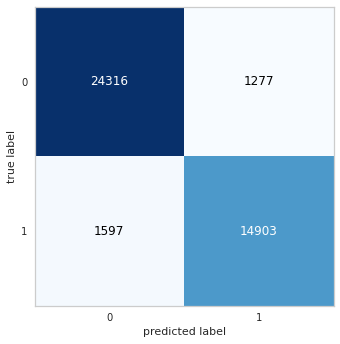

In [26]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cmat = confusion_matrix( predictions['booking_status'],predictions['Label'] )

fig, ax = plot_confusion_matrix(conf_mat=cmat)
plt.show()

In [27]:
holdout_data = pd.read_csv(os.path.join(read_path, 'test.csv'))

In [28]:
holdout_data

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [31]:
holdout_predictions = predict_model( model, data=holdout_data.drop(columns=['id']) )

In [39]:
holdout_predictions['Label']

0        0
1        0
2        0
3        0
4        1
        ..
28063    1
28064    0
28065    0
28066    1
28067    1
Name: Label, Length: 28068, dtype: int64

In [44]:
submission = pd.DataFrame( {'id':holdout_data['id'], 'booking_status': holdout_predictions['Label'] } ).set_index('id')

In [45]:
submission


,booking_status
id,
42100,0
42101,0
42102,0
42103,0
42104,1
...,...
70163,1
70164,0
70165,0


In [46]:
submission.to_csv('submission1.csv')